In [3]:
import pandas as pd

df = pd.read_fwf('data/results_calories.txt',  header=None) # 고정폭으로 구분된 데이터를 읽어옴
df1 = pd.read_fwf('data/results_distance.txt',  header=None) # 고정폭으로 구분된 데이터를 읽어옴
df2 = pd.read_fwf('data/results_stpes.txt',  header=None) # 고정폭으로 구분된 데이터를 읽어옴

df.rename(columns = {0 : 'datetime', 1 : 'calories'}, inplace = True) # 컬럼 이름 재설정

df['distance']=df1[1] # distance 컬럼 추가
df['stpes']=df2[1] # steps 컬럼 추가

In [4]:
df.head() # head 출력

,datetime,calories,distance,stpes
0,2021-04-07,1744.27,7.300000,10174
1,2021-04-08,1865.11,3.460000,4829
2,2021-04-09,2406.20,5.920000,8262
3,2021-04-10,2384.56,6.350000,8864
4,2021-04-11,2456.50,6.059999,8467


In [5]:
df.info() # info 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  167 non-null    object 
 1   calories  167 non-null    float64
 2   distance  167 non-null    float64
 3   stpes     167 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [6]:
df.describe() # describe 출력

,calories,distance,stpes
count,167.000000,167.000000,167.000000
mean,1828.557846,2.831138,3942.784431
std,432.794178,3.029683,4222.034919
min,319.720000,0.000000,0.000000
25%,1527.600000,0.000000,0.000000
50%,1751.850000,2.020000,2828.000000
75%,2094.385000,5.040000,7035.500000
max,3552.730000,13.790000,19259.000000


In [7]:
import datetime

df['datetime'] = pd.to_datetime(df['datetime']) # datetime 포맷 설정

df['Year'] = df['datetime'].dt.year # year 추출
df['Month'] = df['datetime'].dt.month # month 추출
df['Day'] = df['datetime'].dt.day # day 추출

df.head()

,datetime,calories,distance,stpes,Year,Month,Day
0,2021-04-07,1744.27,7.300000,10174,2021,4,7
1,2021-04-08,1865.11,3.460000,4829,2021,4,8
2,2021-04-09,2406.20,5.920000,8262,2021,4,9
3,2021-04-10,2384.56,6.350000,8864,2021,4,10
4,2021-04-11,2456.50,6.059999,8467,2021,4,11


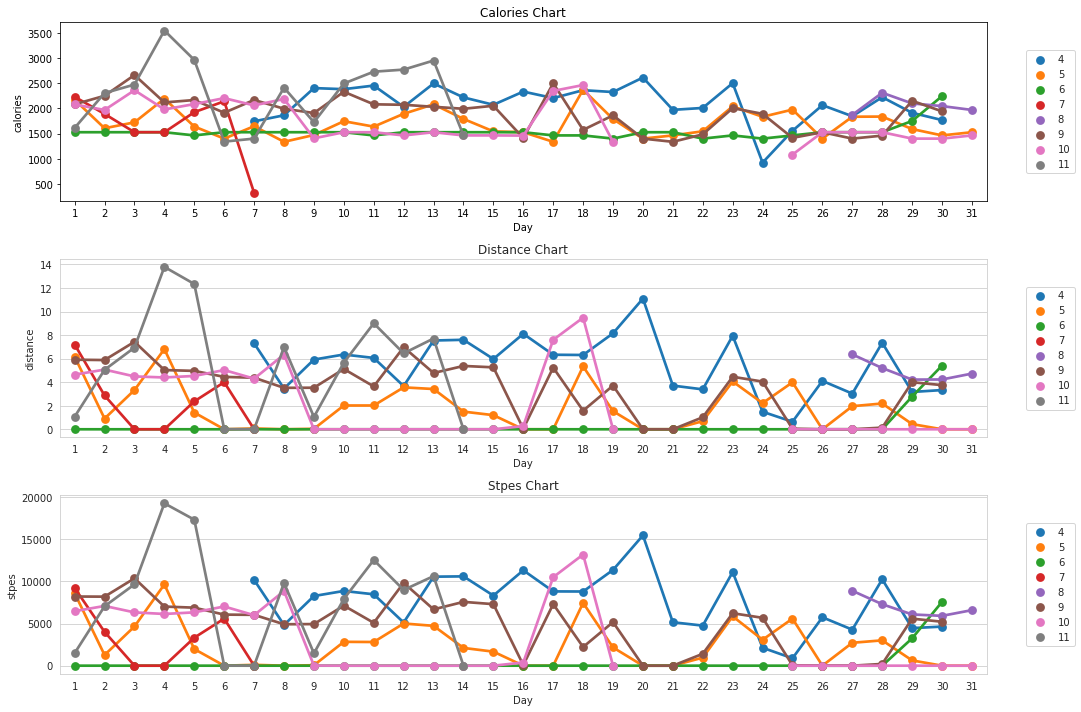

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,10) # figure size 설정

fig = plt.figure() # figure
ax1 = fig.add_subplot(3,1,1) # subplot 삽입
plt.title("Calories Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "calories", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

ax2 = fig.add_subplot(3,1,2) # subplot 삽입
plt.title("Distance Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "distance", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

ax3 = fig.add_subplot(3,1,3) # subplot 삽입
plt.title("Stpes Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "stpes", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

fig.tight_layout() # subplot 간격 겹치지 않게 설정
plt.show() # 그래프 출력

칼로리 예측 모델 구현

In [24]:
data = df[['distance','stpes']].to_numpy() # 데이터 numpy 배열로 저장
target = df['calories'].to_numpy() # 타겟 numpy 배열로 저장

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state = 42) # 훈련 데이터와 테스트 데이터를 나눈다.

In [25]:
print(train_input.shape, test_input.shape) # 훈련 세트와 테스트 세트 크기 확인

(125, 2) (42, 2)


In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input) # 훈련 세트 전처리
test_scaled = ss.transform(test_input) # 테스트 세트 전처리

train_target = train_target.reshape(-1,1) # train_target을 2 차원으로 변경
test_target = test_target.reshape(-1,1) # test_target 2 차원으로 변경

ss2 = StandardScaler()
train_target_scaled = ss2.fit_transform(train_target) # 훈련 세트 전처리
test_target_scaled = ss2.transform(test_target) # 테스트 세트 전처리

train_target = train_target.reshape(-1) # train_target을 기존의 형태로 변경
test_target = test_target.reshape(-1) # test_target을 기존의 형태로 변경

train_target_scaled = train_target_scaled.reshape(-1) # train_target_scaled 1차원으로 변경
test_target_scaled = test_target_scaled.reshape(-1) # test_target_scaled 1차원으로 변경

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 선형 회귀 훈련
lr.fit(train_scaled, train_target_scaled)

print(lr.score(train_scaled, train_target_scaled)) # 훈련 세트 점수 결과
print(lr.score(test_scaled, test_target_scaled)) # 테스트 세트 점수 결과

0.8213613757912678
0.9060808727271383


In [36]:
y_test_pred = lr.predict(test_scaled)

from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(test_target_scaled, y_test_pred)) # MSE 출력

MSE: 0.05251948383704438


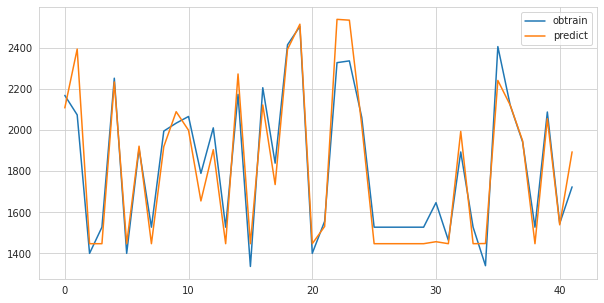

In [39]:
y_test_pred = lr.predict(test_scaled)
y_test_pred = y_test_pred.reshape(-1,1) # 2차원으로 변경
y_test_pred = ss2.inverse_transform(y_test_pred)

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(test_target)
plt.plot(y_test_pred)
plt.legend(['obtrain', 'predict'])
plt.show()

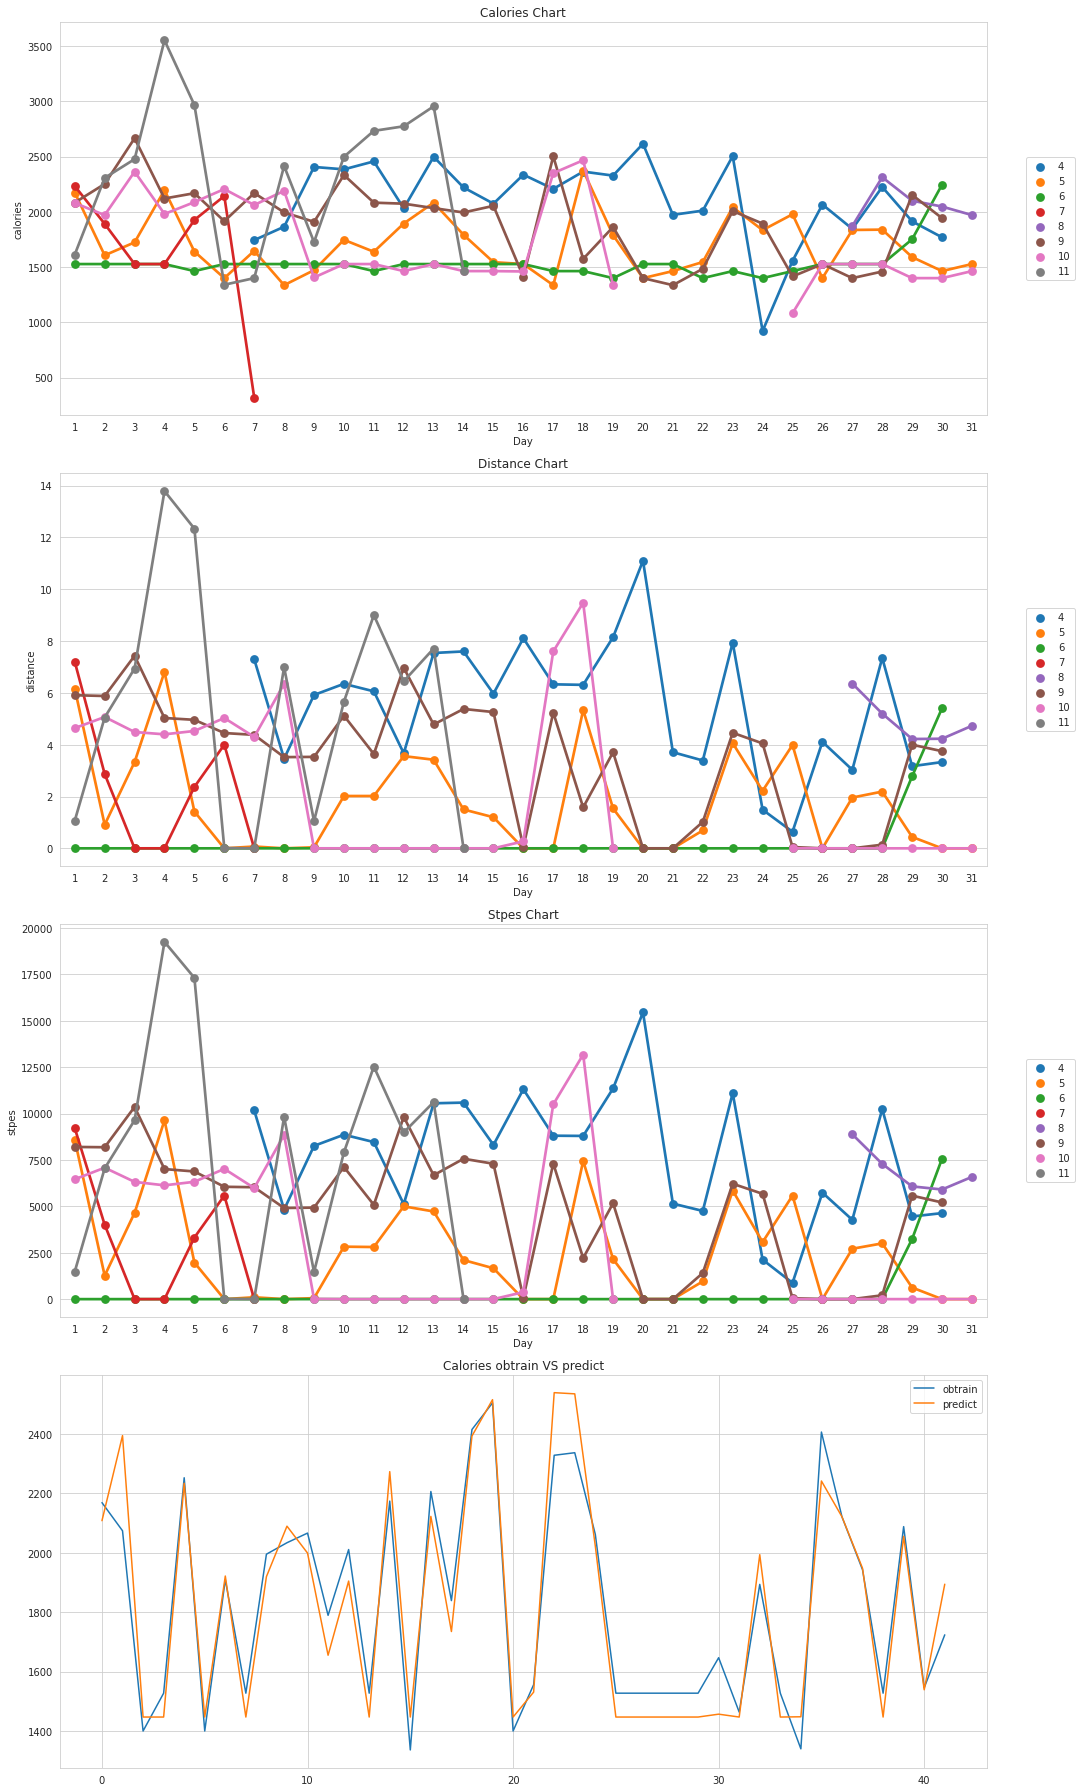

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,25) # figure size 설정

fig = plt.figure() # figure
ax1 = fig.add_subplot(4,1,1) # subplot 삽입
plt.title("Calories Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "calories", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

ax2 = fig.add_subplot(4,1,2) # subplot 삽입
plt.title("Distance Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "distance", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

ax3 = fig.add_subplot(4,1,3) # subplot 삽입
plt.title("Stpes Chart") # title 설정
sns.set_style("whitegrid") # style 설정
sns.pointplot(x = "Day", y = "stpes", hue = "Month", data = df) # 그래프 생성
plt.legend(loc = 'center right', bbox_to_anchor = (1.1, 0.5), ncol = 1) # 그래프 범례

ax4 = fig.add_subplot(4,1,4) # subplot 삽입
plt.title("Calories obtrain VS predict") # title 설정
plt.plot(test_target)
plt.plot(y_test_pred)
plt.legend(['obtrain', 'predict'])

fig.tight_layout() # subplot 간격 겹치지 않게 설정
plt.show() # 그래프 출력